AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [26]:
import pandas as pd

file_path = 'titanic.csv' 
titanic_data = pd.read_csv(file_path)


df = pd.DataFrame(titanic_data)

first_10_rows = df.head(10)

last_20_rows = df.tail(20)

info_buffer = pd.io.common.StringIO()
df.info(buf=info_buffer)
info_output = info_buffer.getvalue()

description = df.describe()

summary = {
    'First 10 Rows': first_10_rows.to_string(index=False),
    'Last 20 Rows': last_20_rows.to_string(index=False),
    'Dataset Info': info_output,
    'Description': description.to_string()
}

for key, value in summary.items():
    print(f"{key}:\n{value}\n{'-'*40}")

First 10 Rows:
 PassengerId Survived  Pclass                                                Name    Sex  Age  SibSp  Parch           Ticket    Fare Cabin Embarked
           1        0       3                             Braund, Mr. Owen Harris   male 22.0      1      0        A/5 21171    7.25   NaN        S
           2        1       1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0      1      0         PC 17599 71.2833   C85        C
           3        1       3                              Heikkinen, Miss. Laina female 26.0      0      0 STON/O2. 3101282   7.925   NaN        S
           4        1       1        Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0      1      0           113803    53.1  C123        S
           5        0       3                            Allen, Mr. William Henry   male 35.0      0      0           373450    8.05   NaN        S
           6        0       3                                    Moran, Mr. James   male  NaN    

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


Missing values in the dataset:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


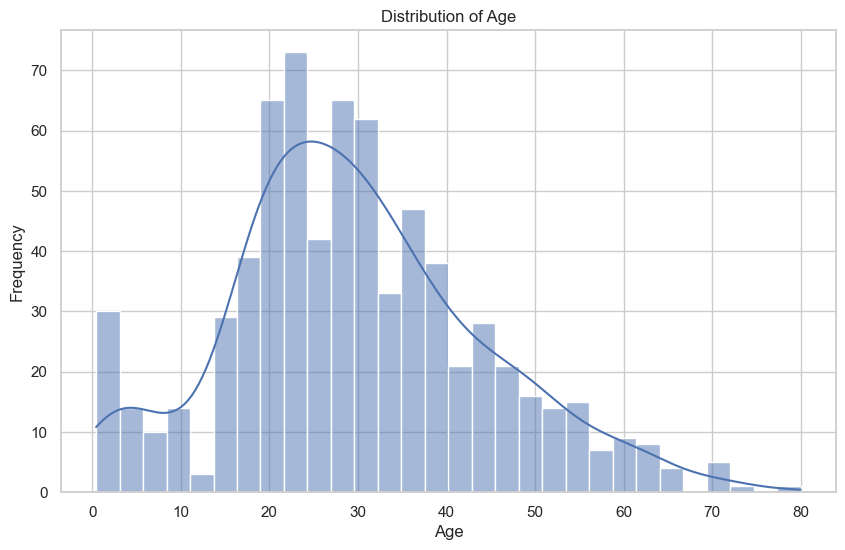

Unique values in 'Survived': ['0' '1' 'Zero' 'One']

Missing values after handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           7
Cabin          0
Embarked       0
dtype: int64

Data types after handling:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


C:\Users\kk7637\AppData\Local\Temp\ipykernel_42276\1142514881.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
C:\Users\kk7637\AppData\Local\Temp\ipykernel_42276\1142514881.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'titanic.csv'  
df = pd.read_csv(file_path)

missing_values = df.isnull().sum()
print("Missing values in the dataset:\n", missing_values)

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


median_age = df['Age'].median()


df['Age'].fillna(median_age, inplace=True)

df['Cabin'].fillna('Unknown', inplace=True)

most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_embarked, inplace=True)

print("Unique values in 'Survived':", df['Survived'].unique())
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce').fillna(0).astype(int)

df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce').abs()

summary_missing = df.isnull().sum()
print("\nMissing values after handling:\n", summary_missing)

print("\nData types after handling:\n", df.dtypes)

AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

object


C:\Users\kk7637\AppData\Local\Temp\ipykernel_42276\2227898076.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_fare_pclass.index, y=average_fare_pclass.values, palette='viridis')


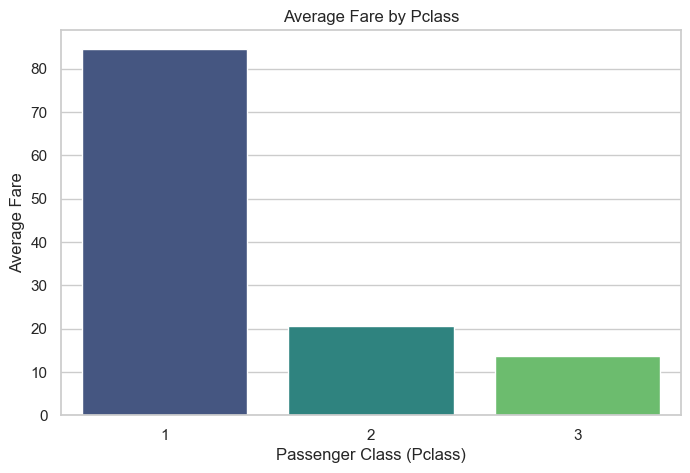

C:\Users\kk7637\AppData\Local\Temp\ipykernel_42276\2227898076.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_fare_sex.index, y=average_fare_sex.values, palette='plasma')


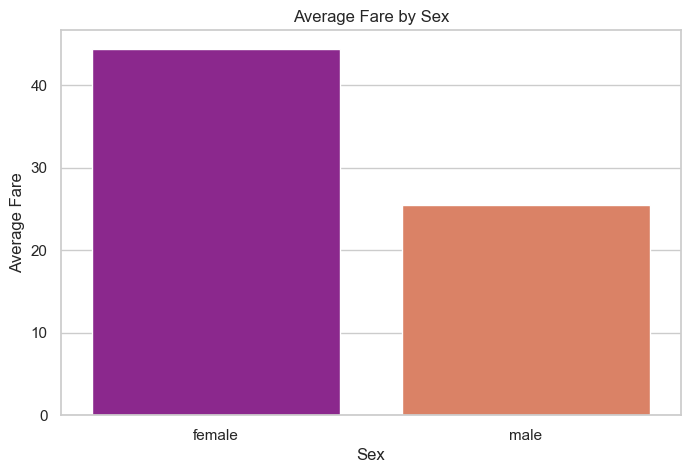

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'titanic.csv' 
df = pd.read_csv(file_path)

print(df['Fare'].dtype)

df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

average_fare_pclass = df.groupby('Pclass')['Fare'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=average_fare_pclass.index, y=average_fare_pclass.values, palette='viridis')
plt.title('Average Fare by Pclass')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

average_fare_sex = df.groupby('Sex')['Fare'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=average_fare_sex.index, y=average_fare_sex.values, palette='plasma')
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

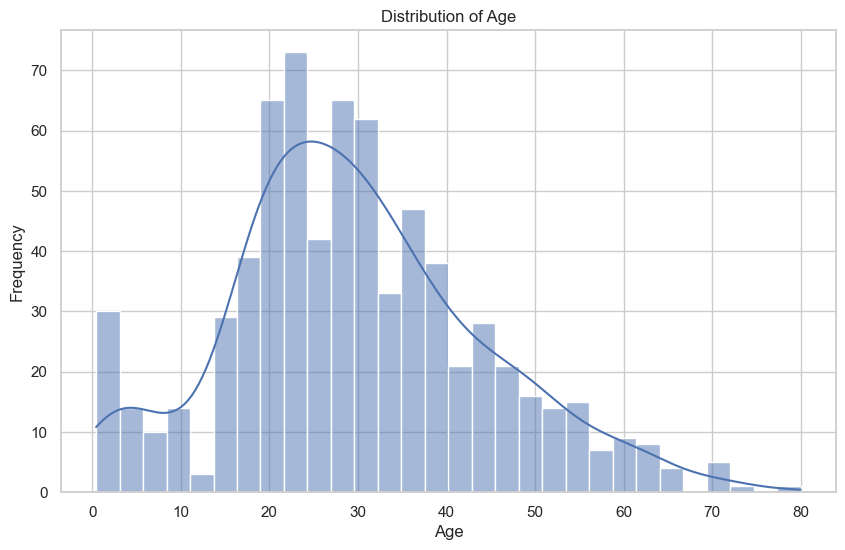

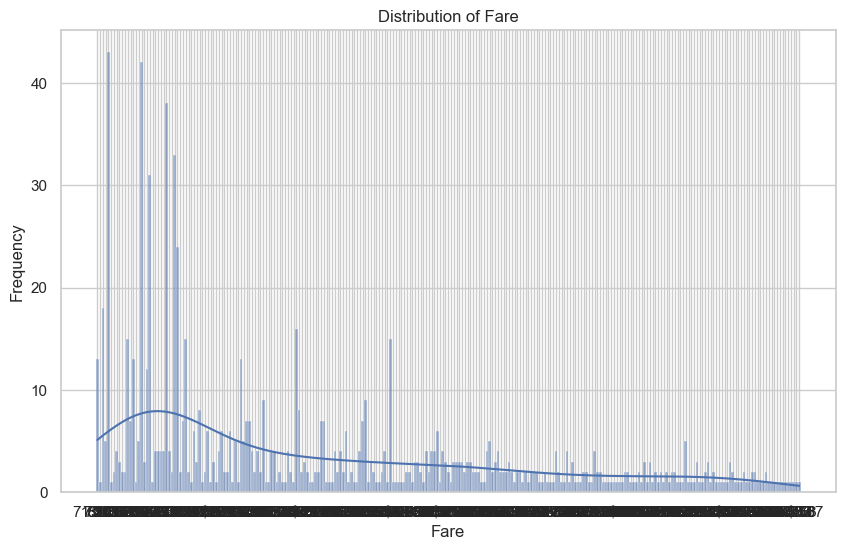

C:\Users\kk7637\AppData\Local\Temp\ipykernel_42276\3788762180.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='Set2')


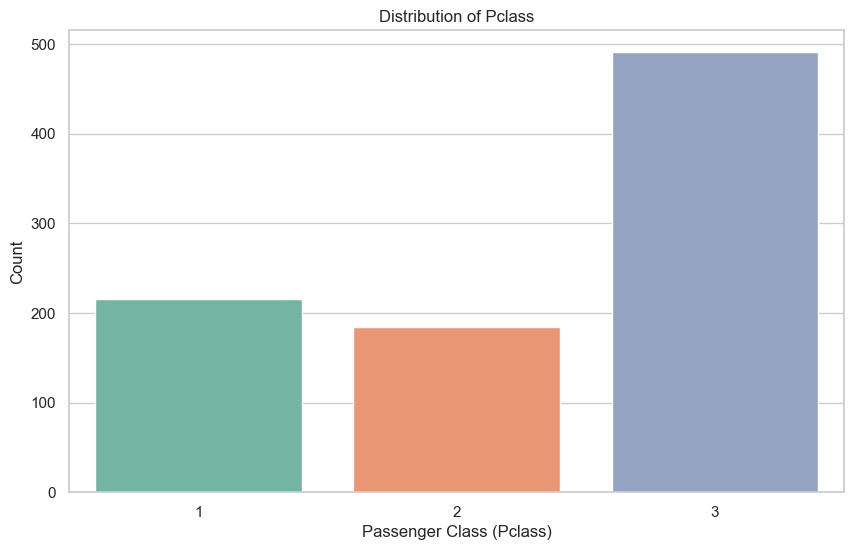

C:\Users\kk7637\AppData\Local\Temp\ipykernel_42276\3788762180.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set1')


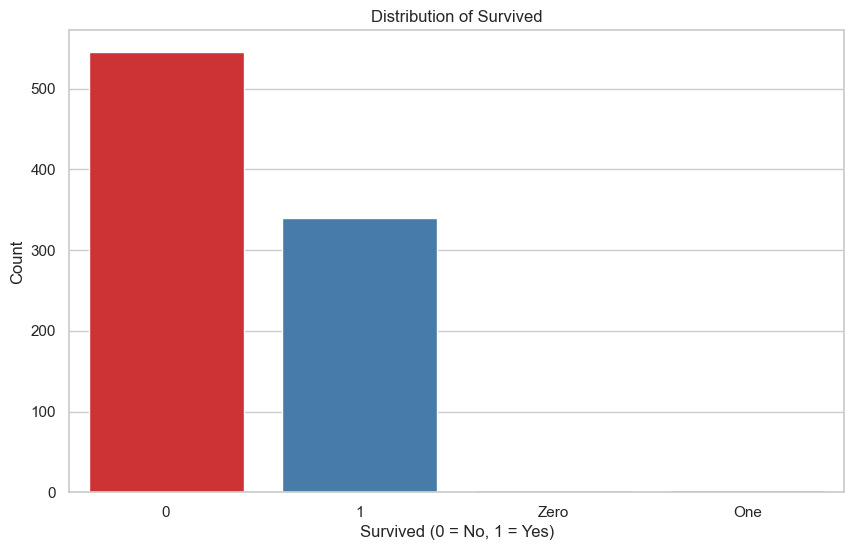

C:\Users\kk7637\AppData\Local\Temp\ipykernel_42276\3788762180.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df, palette='Set3')


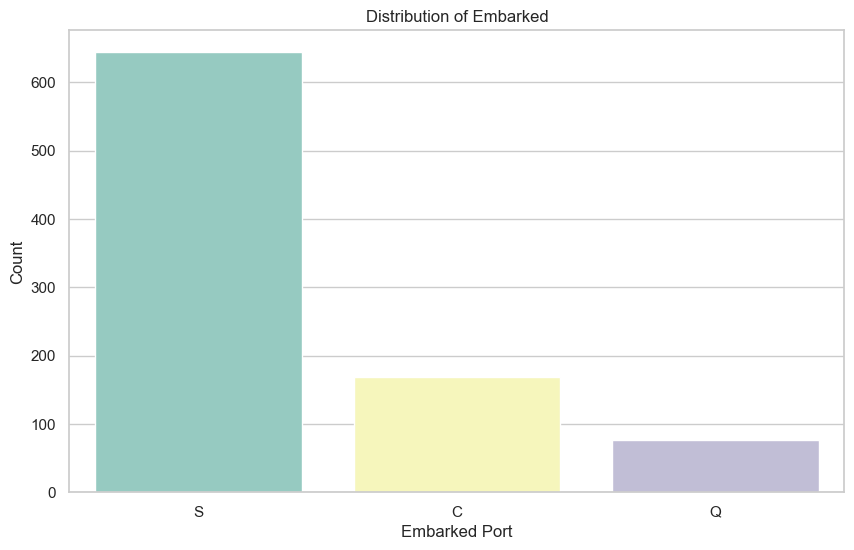

C:\Users\kk7637\AppData\Local\Temp\ipykernel_42276\3788762180.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=df, palette='Set2')


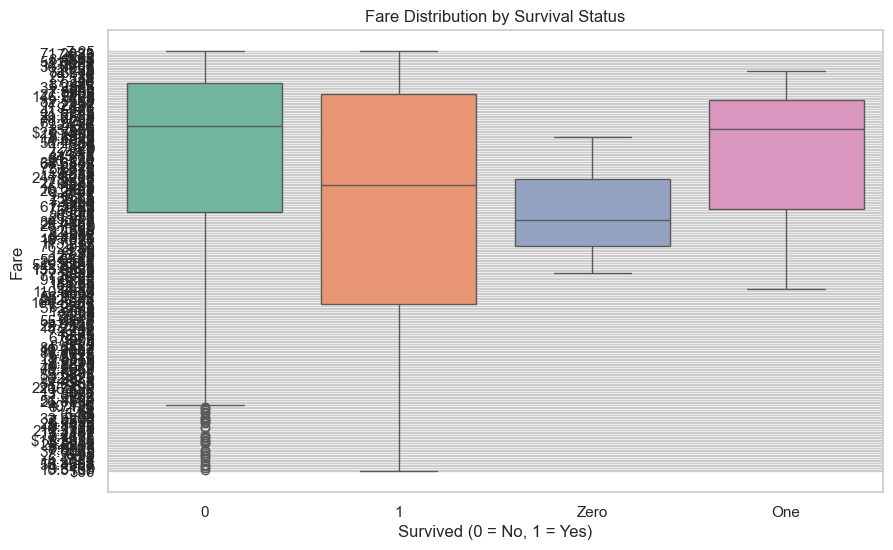

C:\Users\kk7637\AppData\Local\Temp\ipykernel_42276\3788762180.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2')


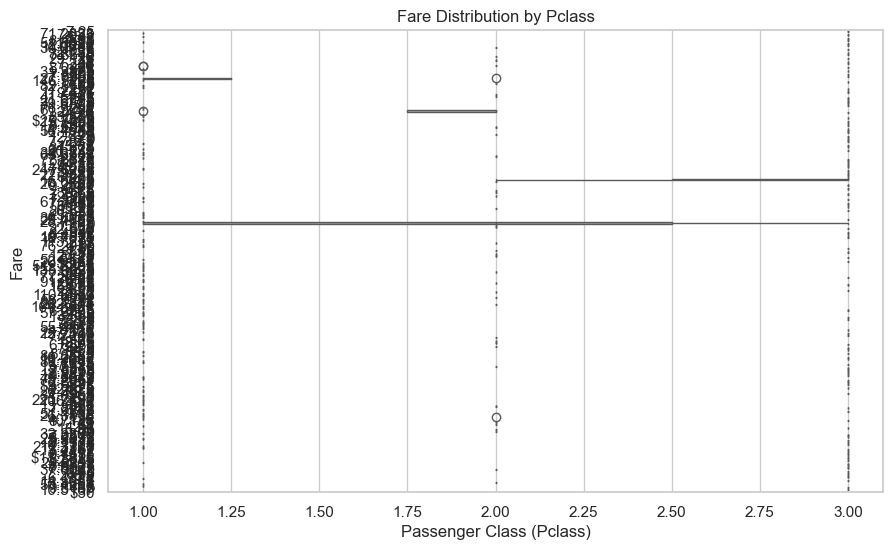

C:\Users\kk7637\AppData\Local\Temp\ipykernel_42276\3788762180.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette='Set2')


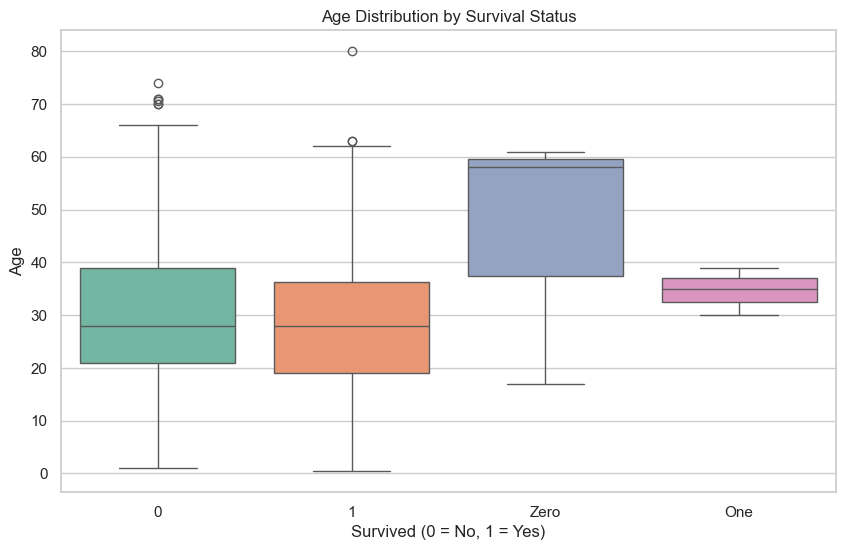

C:\Users\kk7637\AppData\Local\Temp\ipykernel_42276\3788762180.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=df, palette='Set2')


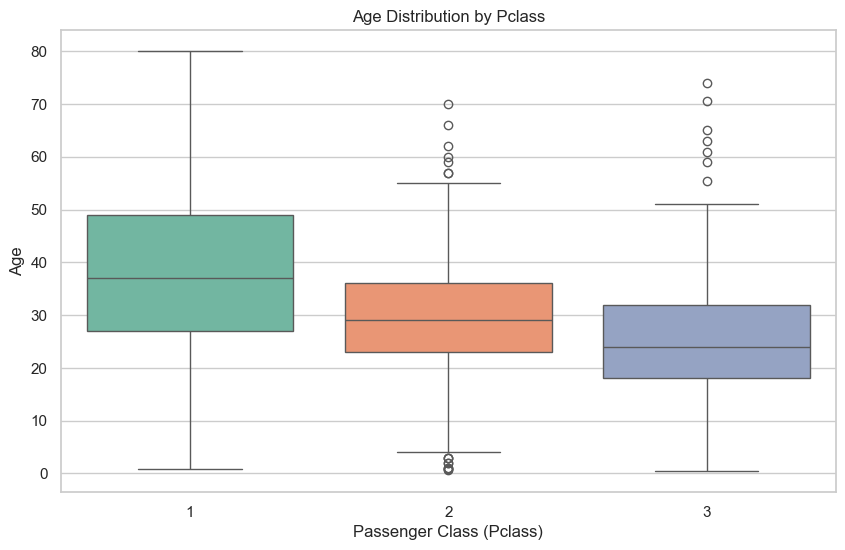

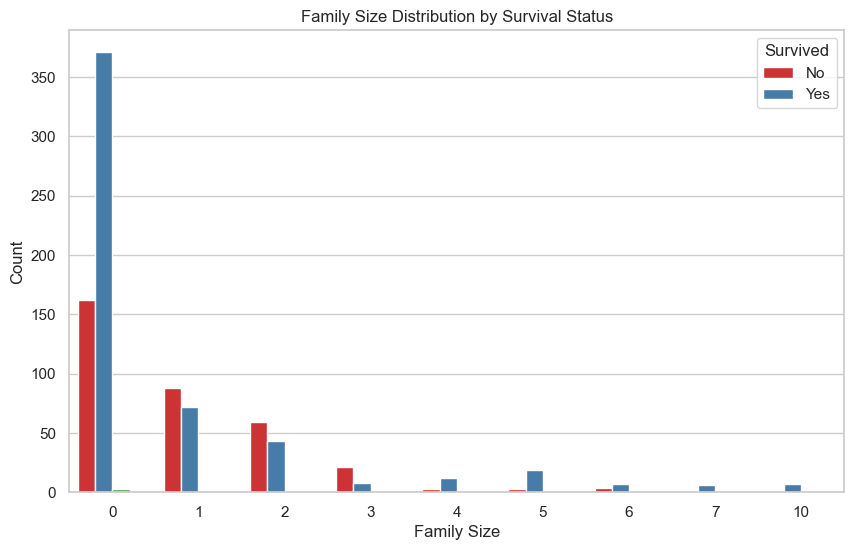

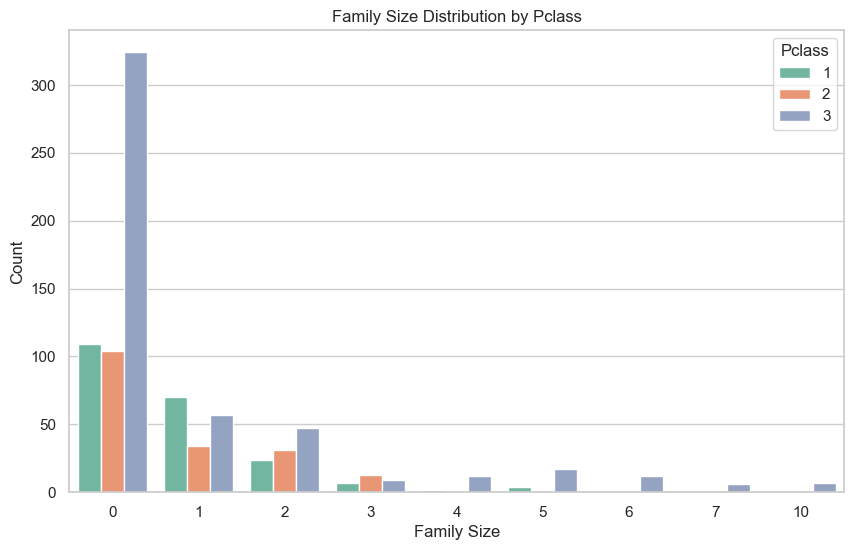

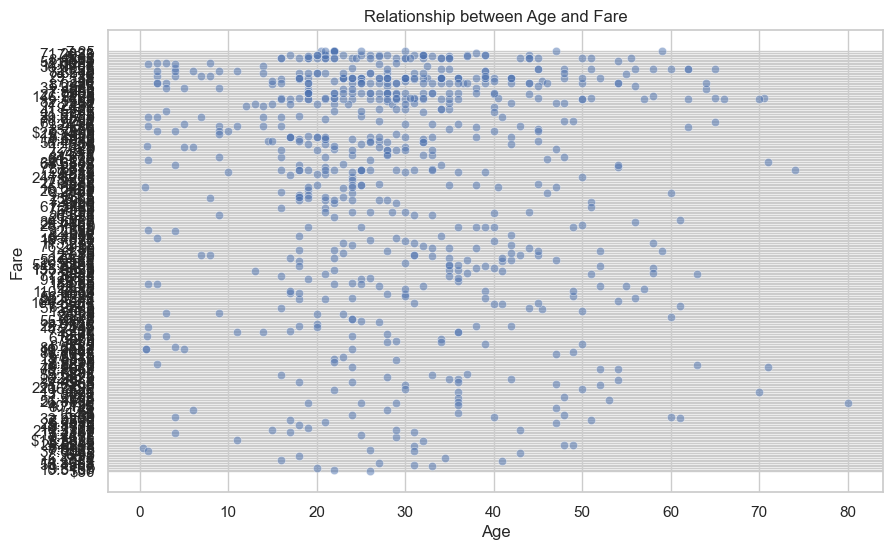

Non-numeric columns in the DataFrame:
Index(['Survived', 'Name', 'Sex', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')


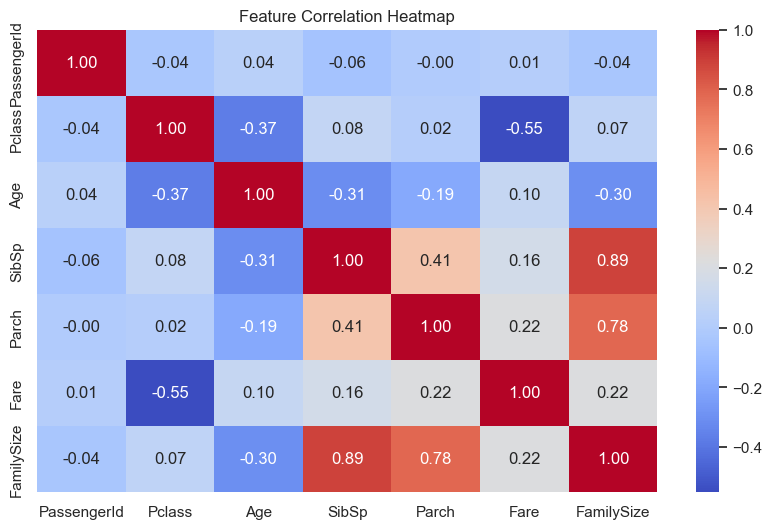

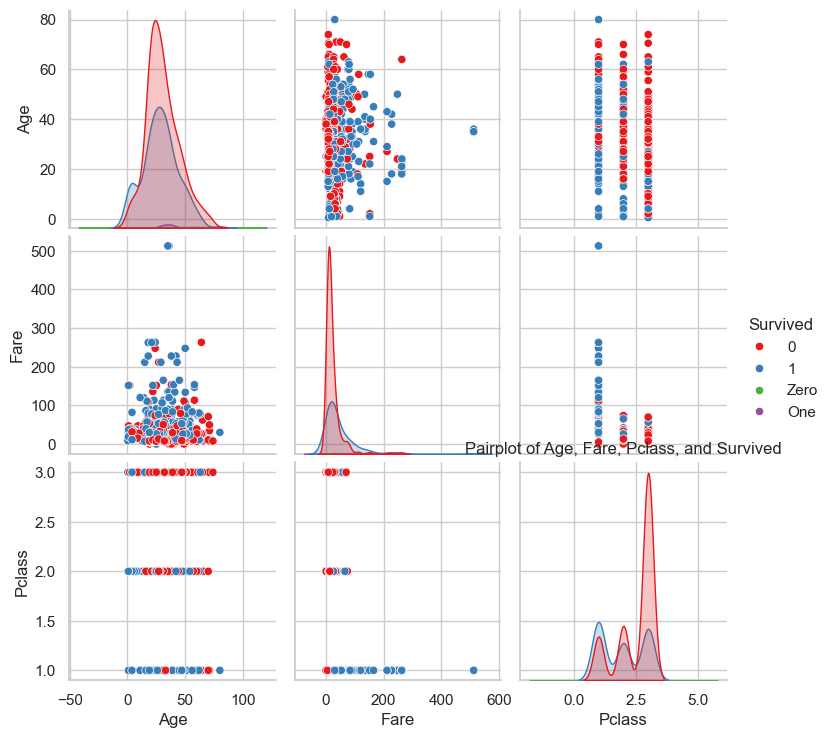

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'titanic.csv' 
df = pd.read_csv(file_path)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'].dropna(), bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=df, palette='Set2')
plt.title('Distribution of Pclass')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df, palette='Set1')
plt.title('Distribution of Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=df, palette='Set3')
plt.title('Distribution of Embarked')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df, palette='Set2')
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2')
plt.title('Fare Distribution by Pclass')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Fare')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Pclass')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Age')
plt.show()

df['FamilySize'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df, palette='Set1')
plt.title('Family Size Distribution by Survival Status')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Pclass', data=df, palette='Set2')
plt.title('Family Size Distribution by Pclass')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Pclass', loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df, alpha=0.5)
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

print("Non-numeric columns in the DataFrame:")
print(df.select_dtypes(exclude='number').columns)

df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Pclass'] = pd.to_numeric(df['Pclass'], errors='coerce')

df_numeric = df.select_dtypes(include='number')

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='Set1')
plt.title('Pairplot of Age, Fare, Pclass, and Survived')
plt.show()

AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

   PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3            4        1       1   
4            5        0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171     7.25   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282    7.925   NaN        S  
3      0            113803     53.1  C123        S  
4      0            373450     8.05   NaN        S  
Passenge

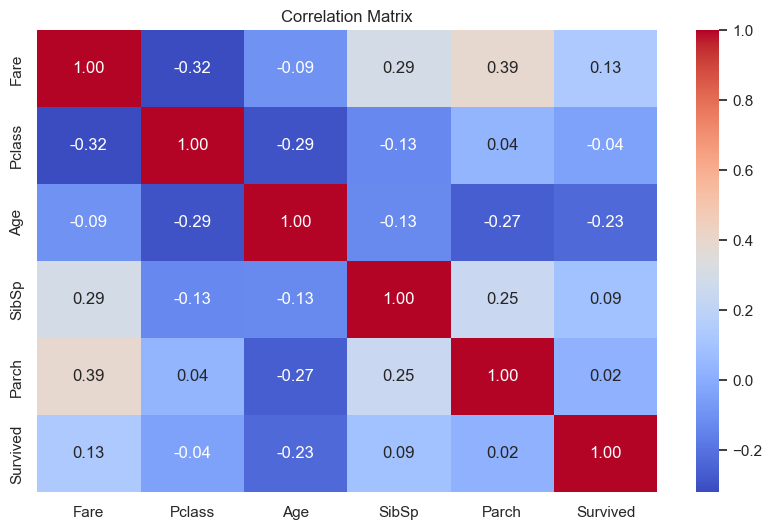

Other possible correlations:
          Survived    Pclass     SibSp     Parch      Fare
Fare      0.131068 -0.318308  0.294051  0.389918  1.000000
Pclass   -0.043203  1.000000 -0.132579  0.035607 -0.318308
Age      -0.227883 -0.294024 -0.125126 -0.265047 -0.093416
SibSp     0.091904 -0.132579  1.000000  0.246616  0.294051
Parch     0.018703  0.035607  0.246616  1.000000  0.389918
Survived  1.000000 -0.043203  0.091904  0.018703  0.131068


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'titanic.csv'
df = pd.read_csv(file_path)

print(df.head())
print(df.dtypes)

numeric_columns = ['Fare', 'Pclass', 'Age', 'SibSp', 'Parch', 'Survived']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()

correlation_matrix = df[numeric_columns].corr()

print("Correlation Matrix:")
print(correlation_matrix)

age_fare_correlation = correlation_matrix.loc['Age', 'Fare']
print(f"Correlation between 'Age' and 'Fare': {age_fare_correlation:.2f}")

survived_pclass_correlation = correlation_matrix.loc['Survived', 'Pclass']
print(f"Correlation between 'Survived' and 'Pclass': {survived_pclass_correlation:.2f}")

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print("Other possible correlations:")
print(correlation_matrix[['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']])